In [196]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv("Team21_Dataset - Sheet1.csv")
df.head()

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Saad, Andrew S",ECE 100 - Linear Electronic Systems (A),S319,35,34,79.4 %,76.5 %,5.85,B+ (3.32),NaN
1,"Silberman, Jack",ECE 148 - Intro to Autonomous Vehicles (A),S219,14,10,100.0 %,100.0 %,15.70,A (4.00),NaN
2,"Abi Samra, Nicholas Camill",ECE 180 - Topics in ECE (A),S219,29,16,100.0 %,100.0 %,4.23,A- (3.80),B+ (3.48)
3,"Abi Samra, Nicholas Camill",ECE 180 - Topics in ECE (A),S119,30,11,100.0 %,100.0 %,6.14,A- (3.91),B+ (3.53)
4,"An, Cheolhong",ECE 180 - Topics in ECE (B),S119,16,5,75.0 %,75.0 %,7.00,A (4.00),NaN


In [27]:
def get_course_number(course):
    course_num = course.split("-")
    return course_num[0]

def get_course_description(course):
    course_description = course.split("-")
    final_course_description = course_description[1].split("(")
    return final_course_description[0]

def grade_cleaner(grade):
    temp =  grade.split("(")
    temp_grade = temp[1]
    temp_grade_2 = temp_grade.split(")")
    final_grade = temp_grade_2[0]
    return final_grade

def percent_cleaner(percent):
    temp = percent.split(" ")
    return temp[0]

def get_department(name):
    department = name.split(" ")
    return department[0]

In [28]:
df.dropna(inplace = True) #Change here to include separate data set for missing data;possible?
df["Course Number"] = df["Course"].apply(get_course_number)
df["Course Description"] = df["Course"].apply(get_course_description)
df["Avg Grade Received"] = df["Avg Grade Received"].apply(grade_cleaner)
df["Avg Grade Expected"] = df["Avg Grade Expected"].apply(grade_cleaner)
df["Rcmnd Class"] = df["Rcmnd Class"].apply(percent_cleaner)
df["Rcmnd Instr"] = df["Rcmnd Instr"].apply(percent_cleaner)
df["Department"] = df["Course Number"].apply(get_department)
df["Rcmnd Class"] = df["Rcmnd Class"].astype(float)
df["Rcmnd Instr"] = df["Rcmnd Instr"].astype(float)
df["Avg Grade Received"] = df["Avg Grade Received"].astype(float)
df["Avg Grade Expected"] = df["Avg Grade Expected"].astype(float)
df["Department"] = df["Department"].astype("category")
df.head()


,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Course Number,Course Description,Department
2,"Abi Samra, Nicholas Camill",ECE 180 - Topics in ECE (A),S219,29,16,100.0,100.0,4.23,3.80,3.48,ECE 180,Topics in ECE,ECE
3,"Abi Samra, Nicholas Camill",ECE 180 - Topics in ECE (A),S119,30,11,100.0,100.0,6.14,3.91,3.53,ECE 180,Topics in ECE,ECE
5,"Baghdadchi, Saharnaz",ECE 101 - Linear Systems Fundamentals (A),SP19,113,99,83.3,84.2,6.99,3.14,2.87,ECE 101,Linear Systems Fundamentals,ECE
6,"Kuzum, Duygu",ECE 103 - Fundamntls/Devices & Materials (A),SP19,53,21,94.7,100.0,6.82,3.26,2.89,ECE 103,Fundamntls/Devices & Materials,ECE
7,"Fullerton, Eric E",ECE 107 - Electromagnetism (A),SP19,104,34,80.0,60.0,10.10,3.00,2.80,ECE 107,Electromagnetism,ECE


In [29]:
df.drop(columns="Course", inplace=True)
df.index = np.arange(0, len(df))
df.head()

,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Course Number,Course Description,Department
0,"Abi Samra, Nicholas Camill",S219,29,16,100.0,100.0,4.23,3.80,3.48,ECE 180,Topics in ECE,ECE
1,"Abi Samra, Nicholas Camill",S119,30,11,100.0,100.0,6.14,3.91,3.53,ECE 180,Topics in ECE,ECE
2,"Baghdadchi, Saharnaz",SP19,113,99,83.3,84.2,6.99,3.14,2.87,ECE 101,Linear Systems Fundamentals,ECE
3,"Kuzum, Duygu",SP19,53,21,94.7,100.0,6.82,3.26,2.89,ECE 103,Fundamntls/Devices & Materials,ECE
4,"Fullerton, Eric E",SP19,104,34,80.0,60.0,10.10,3.00,2.80,ECE 107,Electromagnetism,ECE


In [30]:
selected = df.groupby(["Department", "Course Number", "Instructor","Term"])

In [34]:
cln_df = selected.agg({"Enroll" : "sum",
                    "Evals Made": "sum",
                    "Rcmnd Class": "mean",
                    "Rcmnd Instr" : "mean",
                    "Study Hrs/wk": "mean",
                    "Avg Grade Expected": "mean",
                    "Avg Grade Received": "mean"
                  })
cln_df.to_csv("Preprocess_Completed.csv")
cln_df.head()

Enroll  Evals Made  \
Department Course Number Instructor             Term                       
BENG       BENG 100      Abbasi, Shaghayegh     S119      30           9   
                         Alexandrov, Ludmil B   SP18     163          74   
                                                SP19     174          80   
                         Coleman, Todd Prentice SP13     152          61   
                                                SP14     137          42   

                                                      Rcmnd Class  \
Department Course Number Instructor             Term                
BENG       BENG 100      Abbasi, Shaghayegh     S119         66.7   
                         Alexandrov, Ludmil B   SP18         76.4   
                                                SP19         60.0   
                         Coleman, Todd Prentice SP13         70.7   
                                                SP14         70.7   

                                                      Rcmnd Instr  \
Department Course Number Instructor             Term                
BENG       BENG 100      Abbasi, Shaghayegh     S119        100.0   
                         Alexandrov, Ludmil B   SP18         90.1   
                                                SP19         80.0   
                         Coleman, Todd Prentice SP13         74.1   
                                                SP14         82.9   

                                                      Study Hrs/wk  \
Department Course Number Instructor             Term                 
BENG       BENG 100      Abbasi, Shaghayegh     S119          7.39   
                         Alexandrov, Ludmil B   SP18          7.20   
                                                SP19          7.38   
                         Coleman, Todd Prentice SP13          9.69   
                                                SP14          9.47   

                                                      Avg Grade Expected  \
Department Course Number Instructor             Term                       
BENG       BENG 100      Abbasi, Shaghayegh     S119                3.11   
                         Alexandrov, Ludmil B   SP18                3.18   
                                                SP19                3.14   
                         Coleman, Todd Prentice SP13                3.04   
                                                SP14                3.10   

                                                      Avg Grade Received  
Department Course Number Instructor             Term                      
BENG       BENG 100      Abbasi, Shaghayegh     S119                2.70  
                         Alexandrov, Ludmil B   SP18                2.91  
                                                SP19                2.87  
                         Coleman, Todd Prentice SP13                3.25  
                                                SP14                3.06

In [44]:
#Create Separate Files for each Department
seg_cln_df = cln_df.groupby('Department')
seg_cln_df.get_group("BENG").to_csv("Beng_clnd_data.csv")
seg_cln_df.get_group("CSE").to_csv("Cse_clnd_data.csv")
seg_cln_df.get_group("ECE").to_csv("Ece_clnd_data.csv")
seg_cln_df.get_group("MAE").to_csv("Mae_clnd_data.csv")

In [169]:
def term_to_numeric(term):
    '''
    This function converts the Quarter terms into a numeric date. Each quarter is 
    assigned a number equal to the middle month of that particular quarter. 
    Example Fall 2018 -> 2018-11-01
    '''
    assert isinstance(term,str)
    if(term[0:2] == 'SP'):
        num_date = pd.to_datetime('20' + term[-2:] + '-05-01')
    
    elif(term[0:2] == 'FA'):
        num_date = pd.to_datetime('20' + term[-2:] + '-11-01')

    elif(term[0:2] == 'WI'):
        num_date = pd.to_datetime('20' + term[-2:] + '-02-01')
    
    else:
        num_date = pd.to_datetime('20' + term[-2:] + '-08-01')

        
    return num_date

def compute_grade_deviation(df,top_dev=10,good_dev=5,neg_dev=5):
    '''
    The following function computes the grade deviation 
    1. Difference of Expected grade - Actual grade 
    2. Expected grade - Actual grade
    3. List the top subjects in the current department with most abs deviation
    4. List the top_dev subjects with most difference
    5. List the good_dev, neg_dev course with most positive deviation and negative deviation
    
    Input: Data frame with Course Number, Expected Grade and Received Grade
    Ouput: Data frame with top_dev number of courses and their deviations
    '''
    assert isinstance(df,pd.DataFrame) and isinstance(good_dev,int) \
            and isinstance(top_dev,int) and isinstance(neg_dev,int)
    assert good_dev > 0 and top_dev > 0 and neg_dev > 0
    
    df['Grade_dev_abs'] = np.absolute(df['Avg Grade Expected'] - df['Avg Grade Received'])    
    df_sel = df[['Course Number','Grade_dev_abs','Term']]
    df_sel = df_sel.sort_values(by=['Grade_dev_abs'],ascending=False)
    df_sel.index = np.arange(1, len(df_sel)+1)
    unique_course = []
    unique_deviation = []
    i,j = (0,0)
    #Get unique courses
    while(i < top_dev):
        course = df_sel['Course Number'].iloc[j]
        deviation = df_sel['Grade_dev_abs'].iloc[j]
        j = j + 1
        if(course in unique_course):
            pass
        else:
            unique_course.append(course)
            unique_deviation.append(deviation)
            i = i + 1
    d = {'Course':unique_course,'Grad Deviation':unique_deviation}
    
    return pd.DataFrame(d,index=range(1,top_dev+1))


In [170]:
ece_grp = pd.read_csv('Ece_clnd_data.csv')
compute_grade_deviation(ece_grp)

,Course,Grad Deviation
1,ECE 156,1.42
2,ECE 65,1.37
3,ECE 164,1.32
4,ECE 35,1.23
5,ECE 109,1.18
6,ECE 30,1.18
7,ECE 154B,1.10
8,ECE 101,1.08
9,ECE 102,1.08
10,ECE 15,1.04


In [158]:
cse_grp = pd.read_csv('Cse_clnd_data.csv')
compute_grade_deviation(cse_grp)

,Course,Grad Deviation
1,CSE 140,1.32
2,CSE 8AL,1.11
3,CSE 11,1.04
4,CSE 140L,1.03
5,CSE 191,1.00
6,CSE 20,1.00
7,CSE 131,0.96
8,CSE 127,0.95
9,CSE 105,0.94
10,CSE 5A,0.93


In [159]:
beng_grp = pd.read_csv('Beng_clnd_data.csv')
compute_grade_deviation(beng_grp)

,Course,Grad Deviation
1,BENG 100,0.76
2,BENG 140A,0.72
3,BENG 140B,0.71
4,BENG 186A,0.71
5,BENG 129A,0.70
6,BENG 109,0.68
7,BENG 101,0.68
8,BENG 126B,0.66
9,BENG 181,0.65
10,BENG 134,0.63


In [171]:
mae_grp = pd.read_csv('Mae_clnd_data.csv')
compute_grade_deviation(mae_grp)

,Course,Grad Deviation
1,MAE 110A,1.23
2,MAE 20,1.11
3,MAE 140,1.09
4,MAE 130B,1.05
5,MAE 105,1.05
6,MAE 101C,1.03
7,MAE 120,1.03
8,MAE 104,1.02
9,MAE 118B,1.02
10,MAE 119,1.02


In [192]:
def get_feedback(df):
    '''
    This function computes the total enrolled students in each department
    and the number of feedbacks received in that deparment
    Input: Data Frame of each department with Columns having Enroll and Evals Made
    Output: Total evaluation received, total enrollment and percentage evals in the course 
    '''
    assert isinstance(df,pd.DataFrame) and ('Enroll' in df.columns) and ('Evals Made' in df.columns)
    total_enroll = int(df.agg({'Enroll' : 'sum'}))
    total_evalls = int(df.agg({'Evals Made' : 'sum'}))
    feedback_ratio = total_evalls / total_enroll
    return total_evalls,total_enroll,feedback_ratio*100

Text(0, 0.5, 'Cape Responce Percentage')

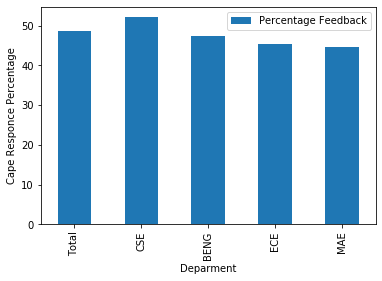

In [218]:
ece_tot_eval,ece_tot_enrol,ece_fdbk = get_feedback(ece_grp)
cse_tot_eval,cse_tot_enrol,cse_fdbk = get_feedback(cse_grp)
mae_tot_eval,mae_tot_enrol,mae_fdbk = get_feedback(mae_grp)
beng_tot_eval,beng_tot_enrol,beng_fdbk = get_feedback(beng_grp)
tot_fdbk = (ece_tot_eval + beng_tot_eval + cse_tot_eval + mae_tot_eval)*100 / (ece_tot_enrol + beng_tot_enrol + cse_tot_enrol + mae_tot_enrol) 
values = [tot_fdbk,cse_fdbk,beng_fdbk,ece_fdbk,mae_fdbk]
deparment = 'Deparment'
feedback = 'Percentage Feedback'
deparment_names = ['Total','CSE','BENG','ECE','MAE']
fdbk_df = pd.DataFrame({deparment : deparment_names, feedback : values})
fdbk_bar_plot = fdbk_df.plot(x = deparment,y = feedback,kind='bar')
fdbk_bar_plot.set_ylabel('Cape Responce Percentage')
